#### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pylab as plt
import pickle

#### Define paths

In [8]:
plots_path = os.path.join('/home/renat_sergazinov',
                          'python-git-workspace', 'PhotoForceReconML', 'model_testing', 'small', 'plots')

#### Preparing data

In [13]:
df_error_inner = pd.DataFrame()
df_error_inner["M"] = range(2, 7)
df_error_inner["S = 320"] = [0.0497, 0.0803, 0.0799, 0.0831, 0.0779]
df_error_inner["S = 800"] = [0.0501, 0.0645, 0.0730, 0.0799, 0.0747]
df_error_inner["S = 3,200"] = [0.0360, 0.0516, 0.0552, 0.0629, 0.0671]
df_error_inner = pd.melt(df_error_inner, id_vars=["M"], value_name="Impact angle MAE [rad]", 
                         var_name="Size of training set")

In [14]:
df_error_tang = pd.DataFrame()
df_error_tang["M"] = range(2, 7)
df_error_tang["S = 320"] = [0.0732, 0.1640, 0.1891, 0.2065, 0.2005]
df_error_tang["S = 800"] = [0.0575, 0.1427, 0.1790, 0.2018, 0.1984]
df_error_tang["S = 3,200"] = [0.0357, 0.1073, 0.1507, 0.1760, 0.1830]
df_error_tang = pd.melt(df_error_tang, id_vars=["M"], value_name="Tangent angle MAE [rad]",
                        var_name="Size of training set")

In [15]:
df_error_mag = pd.DataFrame()
df_error_mag["M"] = range(2, 7)
df_error_mag["S = 320"] = [0.0183, 0.0393, 0.0634, 0.0516, 0.0439]
df_error_mag["S = 800"] = [0.0209, 0.0410, 0.0474, 0.0543, 0.0421]
df_error_mag["S = 3,200"] = [0.0064, 0.0262, 0.0353, 0.0407, 0.0368]
df_error_mag = pd.melt(df_error_mag, id_vars=["M"], value_name="Force magnitude MAE [N]", 
                       var_name="Size of training set")

#### Plot data

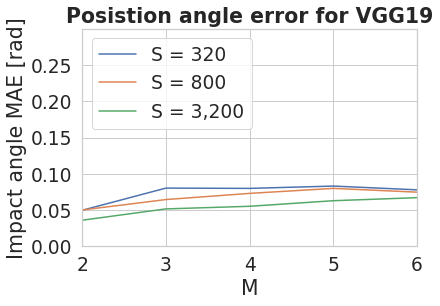

In [16]:
sns.set_theme(style="whitegrid", font_scale=1.7)
s = sns.lineplot(data=df_error_inner, x="M", y="Impact angle MAE [rad]", hue="Size of training set")
s.set(ylim = (0,0.3), xlim = (2,6))
s.set(xticks = np.arange(2,7,1))
s.set(yticks = np.arange(0,0.3,0.05))
s.set_title('Posistion angle error for VGG19',fontdict= {'fontweight':'bold'})
plt.legend(loc='upper left')
plt.savefig(os.path.join(plots_path, 'small_angles_inner_error.pdf'),
            dpi=300, bbox_inches='tight')

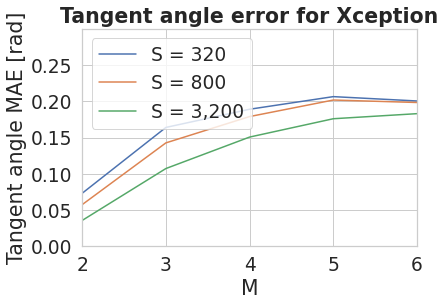

In [17]:
sns.set_theme(style="whitegrid", font_scale=1.7)
s = sns.lineplot(data=df_error_tang, x="M", y="Tangent angle MAE [rad]", hue="Size of training set")
s.set(ylim = (0,0.3), xlim = (2,6))
s.set(xticks = np.arange(2,7,1))
s.set(yticks = np.arange(0,0.3,0.05))
s.set_title('Tangent angle error for Xception',fontdict= {'fontweight':'bold'})
plt.legend(loc='upper left')
plt.savefig(os.path.join(plots_path, 'small_angles_tang_error.pdf'),
            dpi=300, bbox_inches='tight')

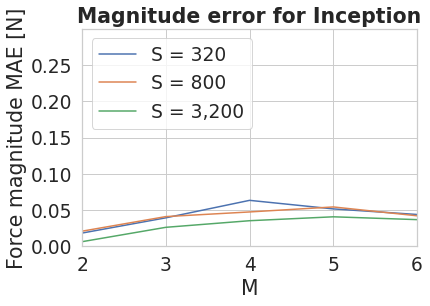

In [19]:
sns.set_theme(style="whitegrid", font_scale=1.7)
s = sns.lineplot(data=df_error_mag, x="M", y="Force magnitude MAE [N]", hue="Size of training set")
s.set(ylim = (0,0.3), xlim = (2,6))
s.set(xticks = np.arange(2,7,1))
s.set(yticks = np.arange(0,0.3,0.05))
s.set_title('Magnitude error for Inception',fontdict= {'fontweight':'bold'})
plt.legend(loc='upper left')
plt.savefig(os.path.join(plots_path, 'small_magnitude_mae_error.pdf'),
            dpi=300, bbox_inches='tight')

#### Plot Magnitudes in Bins (MAE and MAPE)

In [20]:
with open(os.path.join(os.getcwd(), 'plots', "magnitude_mape_400.pkl"), "rb") as fh:
  df_error_mape_400 = pickle.load(fh)
with open(os.path.join(os.getcwd(), 'plots', "magnitude_mape_1000.pkl"), "rb") as fh:
  df_error_mape_1000 = pickle.load(fh)
with open(os.path.join(os.getcwd(), 'plots', "magnitude_mape_4000.pkl"), "rb") as fh:
  df_error_mape_4000 = pickle.load(fh)

In [21]:
equiv = {'2 forces': 'M = 2', '3 forces' : 'M = 3', '4 forces' : 'M = 4',
        '5 forces' : 'M = 5', '6 forces' : 'M = 6'}
df_error_mape_400['M'] = df_error_mape_400['Forces'].map(equiv)
df_error_mape_400 = df_error_mape_400.drop(columns = 'Forces')

df_error_mape_1000['M'] = df_error_mape_1000['Forces'].map(equiv)
df_error_mape_1000 = df_error_mape_1000.drop(columns = 'Forces')

df_error_mape_4000['M'] = df_error_mape_4000['Forces'].map(equiv)
df_error_mape_4000 = df_error_mape_4000.drop(columns = 'Forces')

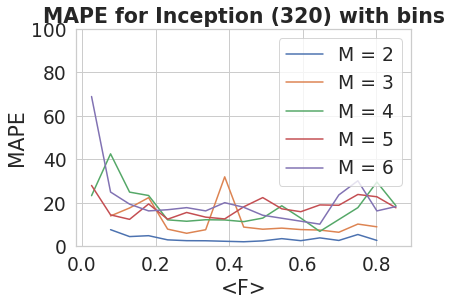

In [24]:
df_error_mape_400 = df_error_mape_400[df_error_mape_400['Mean bin magnitude'] <= 0.9]

sns.set_theme(style="whitegrid", font_scale=1.7)
s = sns.lineplot(data=df_error_mape_400, x="Mean bin magnitude", y="Mean absolute percent error", hue="M")
s.set(ylim = (0,100))
s.set(xlabel = '<F>',
     ylabel = 'MAPE')
s.set_title('MAPE for Inception (320) with bins',fontdict= {'fontweight':'bold'})
plt.legend(loc='upper right')
plt.savefig(os.path.join(plots_path, 'magnitude_percent_error_400.pdf'), dpi=300, bbox_inches='tight')

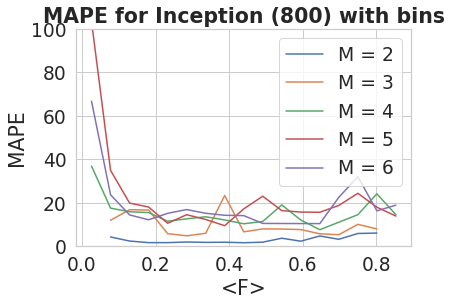

In [26]:
df_error_mape_1000 = df_error_mape_1000[df_error_mape_1000['Mean bin magnitude'] <= 0.9]

sns.set_theme(style="whitegrid", font_scale=1.7)
s = sns.lineplot(data=df_error_mape_1000, x="Mean bin magnitude", y="Mean absolute percent error", hue="M")
s.set(ylim = (0,100))
s.set(xlabel = '<F>',
     ylabel = 'MAPE')
s.set_title('MAPE for Inception (800) with bins',fontdict= {'fontweight':'bold'})
plt.legend(loc='upper right')
plt.savefig(os.path.join(plots_path, 'magnitude_percent_error_1000.pdf'), dpi=300, bbox_inches='tight')

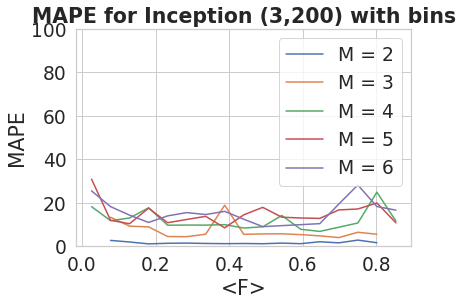

In [27]:
df_error_mape_4000 = df_error_mape_4000[df_error_mape_4000['Mean bin magnitude'] <= 0.9]

sns.set_theme(style="whitegrid", font_scale=1.7)
s = sns.lineplot(data=df_error_mape_4000, x="Mean bin magnitude", y="Mean absolute percent error", hue="M")
s.set(ylim = (0,100))
s.set(xlabel = '<F>',
     ylabel = 'MAPE')
s.set_title('MAPE for Inception (3,200) with bins',fontdict= {'fontweight':'bold'})
plt.legend(loc='upper right')
plt.savefig(os.path.join(plots_path, 'magnitude_percent_error_4000.pdf'), dpi=300, bbox_inches='tight')